In [16]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#import sys
class MLP():

    def __init__(self, numinputs=4, hiddenlayers=[4,2,2,1], numoutputs=1, activationfunc = [1,1,1], alpha = 0.25, lossfunc = 1):
        self.numinputs = numinputs
        self.hiddenlayers = hiddenlayers
        self.numoutputs = numoutputs

        # create a generic representation of the layers
        layers = [numinputs] + hiddenlayers + [numoutputs]
         
        # create random connection weights for the layers
        weights = []
        bias = []
        for i in range(len(layers)-1):
            bias.append(np.ones(layers[i+1]))
            weights.append(np.random.rand(layers[i], layers[i+1]))
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
        
        
        if lossfunc == 1: 
            self.lss = self.loss_func
        elif lossfunc == 2: 
            self.lss = self.cross_entropy_loss
    
        self.activationfun = [np.vectorize(self._sigmoid) if i == 1 else np.vectorize(self._relu) if i == 2   else np.vectorize(self._tanh)   for i in activationfunc]
        self.activationfunderv = [np.vectorize(self._sigmoid_derv) if i == 1 else np.vectorize(self._relu_derv) if i == 2   else np.vectorize(self._tanh_derv)  for i in activationfunc]

# #         #Test
#         self.weights = [np.array([[-0.2, -0.1],
#         [ 0.2,  0.3]]), np.array([[0.2],
#         [0.3]])]
#         self.bias = [np.array([0.1, 0.1]), np.array([0.2])]
        
        
        


    def weight_update(self,weight_update):
        self.weights = [  w-w_u for w,w_u in zip(self.weights, weight_update) ]
        
    
    def bias_update(self,bias_update): 
        self.bias = [  b-b_u for b,b_u in zip(self.bias, bias_update) ]

    
    def _sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
        
    
    def _relu(self, x): 
        return max(0, x)
    
    def _tanh(self, x): 
         return (np.exp(x) - np.exp(-x))/ (np.exp(x)+ np.exp(-x))
        
        
    def _sigmoid_derv(self, x): 
             val = self._sigmoid(x) 
             return val * (1-val)
       

    def _relu_derv(self, x): 
        return 1 if x>0 else 0
    
    def _tanh_derv(self, x):
        return 1 - (((np.exp(x) - np.exp(-x))**2)/ ((np.exp(x)+ np.exp(-x))**2))

    def loss_func(self, x,y): 
        #add aquare root
        fun = np.vectorize(math.sqrt)
        return (y-x)**2
    
    
    def cross_entropy_loss(self,pred, y):
        if y == 1:
            return -np.log(pred)
        else:
            return -np.log(1 - pred)
    
    def forward_propagate(self,inputs):
        activations = inputs
        net_inputs = []
        z_value = []
        activated_value = []
        activated_value.append(inputs)
        
        for w,b,a in zip(self.weights,self.bias,self.activationfun):
            
            net_inputs = (np.dot(activations, w)) + b
            activations = a(net_inputs)
            z_value.append(net_inputs)
            activated_value.append(activations)

        return z_value, activated_value
    

    def back_propogate(self,z_value, activated_value,  y,step):
        eval =  self.lss(activated_value[-1],y)
        weight_update = []
        bias_update = []
        sig_derv_activ = []
        for i in range(len(self.weights)-1, -1,-1):
                
                sig_derv_activ = self.activationfunderv[i](z_value[i])*eval
                weight_updt = self.alpha* (1.0/step)*np.sum(np.array([np.dot(np.reshape(sig_derv_activ[x],(-1,1)),np.reshape(activated_value[i][x],(-1,1)).transpose()) for x in range((len(activated_value[i])))]),axis=0)

                bias_updt = np.average(sig_derv_activ,axis = 0)* self.alpha
                eval = [np.dot(np.reshape(sig_derv_activ[x], (-1, 1)).transpose(),self.weights[i].transpose()) [0]for x in range(len(sig_derv_activ))]
                weight_update.insert(0,weight_updt.transpose())
                bias_update.insert(0,bias_updt)
        return weight_update, bias_update
        
        
        
    def predict_values(self, inputs, y): 
        z_value, activated_value = mlp.forward_propagate(np.array(inputs))
        loss = self.lss(activated_value[-1],np.reshape(np.array(y),(-1,1)))
        cost = (1.0/len(y))*sum(loss)
        print('#########')
        print('Cost:'+str(cost))
        return activated_value[-1],loss, cost

def training(df_X,hiddenlayers,numoutputs,activationfunc,alpha,loss,step, epochs,Y_train):
    print('Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH')
    print('Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy')
    print('#########')
    print('Results for hyperparameter:')
    print('Epochs:' +str(epochs)) 
    print('Steps:' + str(step))
    print('Learning rate:' +str(alpha))
    print('Number of hidden layers:'+str(len(hiddenlayers)) )
    print('Loss function:'+str(lossfunc))
    print('Activation functions:'+str(activationfunc))
    mlp = MLP(df_X.shape[1], hiddenlayers, numoutputs,activationfunc, alpha, lossfunc)

     # Need to add this as arg as well and epochs
    for i in range(epochs):
        for i in range(1, sample_len,step): #sample_len,5): 
            z_value, activated_value =mlp.forward_propagate(np.array(X_train.iloc[0:i]))
            weight_update, bias_update= mlp.back_propogate(z_value,activated_value, np.array(Y_train.iloc[0:i]).reshape(i,1),step)
            weight_update, bias_update= mlp.back_propogate(z_value,activated_value, np.array(Y_train.iloc[0:i]).reshape(i,1),step)
            mlp.weight_update(weight_update)
            mlp.bias_update(bias_update)
    return mlp
           
    
if __name__ == "__main__":

#     df = pd.read_csv('/Users/smiroshnikova/Desktop/trial.csv',header=None)
    df = pd.read_csv('/Users/smiroshnikova/Desktop/data_banknote_authentication.csv',header=None)

    df_Y = df.iloc[:,-1]
    df_X = df.iloc[:,0:-1]
    X_train,X_test,Y_train,Y_test=train_test_split(df_X,df_Y,test_size=0.15)
    sample_len = len(X_train)
    epochs = 1
    #"[1,2,3] 0.25 [1,2,1] 1" input format
    """b=sys.argv[1]
    c=b.split("[")
    d=c[1].split("]")
    e=d[0].split(",")
    hidden=[]
    e=['1','2','3']
    for i in range (len(e)):
        hidden.append(int(e[i]))

    learningrate=float(sys.argv[2])
    b1=sys.argv[3]
    f=b1.split("[")
    g=f[1].split("]")
    h=g[0].split(",")
    activation=[]
    for j in range (len(h)):
        activation.append(int(h[j]))
    lossfunction=int(sys.argv[4])
    print(hidden)
    print(learningrate)
    print(activation)
    print(lossfunction)
    """
    
    hiddenlayers=[2,2]
    numoutputs=1
    activationfunc = [1,1,1]
    alpha = 0.25
    lossfunc =1
    step = 5 
    epochs = 500
    mlp = training(X_train, hiddenlayers, numoutputs,activationfunc , alpha, lossfunc, step, epochs,Y_train)
    pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
    
    epoch_test = []
    for i in range(0, 10000, 5000): 
        mlp = training(X_train, hiddenlayers, numoutputs,activationfunc , alpha, lossfunc, step, i,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        epoch_test.append((i,cost))
    
    steps_test = []
    for i in range(1,len(X_train), 20): 
        mlp = training(X_train, hiddenlayers, numoutputs,activationfunc , alpha, lossfunc, i, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        steps_test.append((i,cost))
        
    activation_static_test = []
    for i in range(1,4):
        mlp = training(X_train, hiddenlayers, numoutputs,[i for x in range(len(hiddenlayers) + 1)], alpha, lossfunc, step, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        activation_static_test.append((i,cost))
        alpha_test = []

    for i in np.arange(0,1, 0.10):
        mlp = training(X_train, hiddenlayers, numoutputs,activationfunc , i, lossfunc, step, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        alpha_test.append((i,cost))
    lossfunc_test = []
    
    for i in range(1,3):
        mlp = training(X_train, hiddenlayers, numoutputs,activationfunc , alpha, i, step, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        lossfunc_test.append((i,cost))

    from sympy.utilities.iterables import multiset_permutations
    import numpy as np

    perms = []
    for i in range(1,6): 

        for p in multiset_permutations(np.random.permutation(i)+1):
            perms.append(p)

    for i in perms: 
        
        mlp = training(X_train, i, numoutputs,[1]*(len(i)+1) , alpha, lossfunc, step, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        lossfunc_test.append((i,cost))

    

   

Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:500
Steps:5
Learning rate:0.25
Number of hidden layers:2
Loss function:1
Activation functions:[1, 1, 1]
#########
Cost:[0.44215067]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:0
Steps:5
Learning rate:0.25
Number of hidden layers:2
Loss function:1
Activation functions:[1, 1, 1]
#########
Cost:[0.33985899]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:5000
Steps:5
Learning rate:0.25
Number of hidden layers:2
Loss function:1
Activation functions:[1, 1, 1]
#########
Cost:[0.44215854]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> t

#########
Cost:[0.44215698]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:500
Steps:5
Learning rate:0.25
Number of hidden layers:2
Loss function:1
Activation functions:[1, 1, 1]
#########
Cost:[0.44215063]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:500
Steps:5
Learning rate:0.25
Number of hidden layers:2
Loss function:1
Activation functions:[1, 1, 1]
#########
Cost:[0.4421506]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:500
Steps:5
Learning rate:0.25
Number of hidden layers:1
Loss function:1
Activation functions:[1, 1]
#########
Cost:[0.44216949]
Activation Functions are as follows: 1 -> S

#########
Cost:[0.44214262]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:500
Steps:5
Learning rate:0.25
Number of hidden layers:4
Loss function:1
Activation functions:[1, 1, 1, 1, 1]
#########
Cost:[0.44215065]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:500
Steps:5
Learning rate:0.25
Number of hidden layers:4
Loss function:1
Activation functions:[1, 1, 1, 1, 1]
#########
Cost:[0.44214261]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:500
Steps:5
Learning rate:0.25
Number of hidden layers:4
Loss function:1
Activation functions:[1, 1, 1, 1, 1]
#########
Cost:[0.44215338]
Activation Functions 

#########
Cost:[0.44215073]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:500
Steps:5
Learning rate:0.25
Number of hidden layers:5
Loss function:1
Activation functions:[1, 1, 1, 1, 1, 1]


KeyboardInterrupt: 

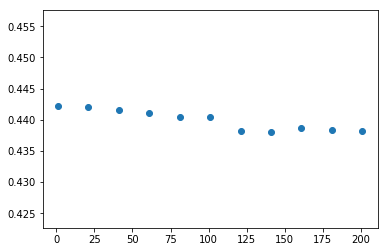

In [27]:
plt.scatter(*zip(*steps_test))
plt.show()

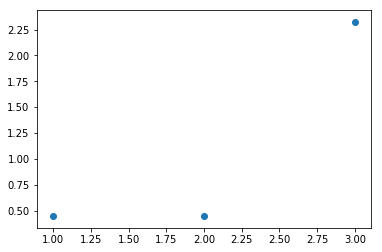

In [35]:
plt.scatter(*zip(*activation_static_test))
plt.show()

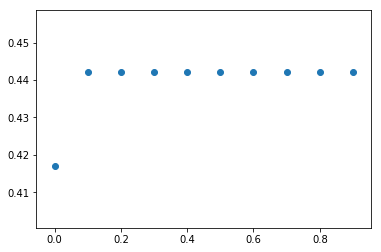

In [32]:
plt.scatter(*zip(*alpha_test))
plt.show()

In [36]:
#actually permutations
lossfunc_main = lossfunc_test

In [ ]:
epoch_test = []
for i in range(0, 10000, 2500): 
        mlp = training(X_train, hiddenlayers, numoutputs,activationfunc , alpha, lossfunc, step, i,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        epoch_test.append((i,cost))
  


Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:0
Steps:5
Learning rate:0.25
Number of hidden layers:2
Loss function:1
Activation functions:[1, 1, 1]
#########
Cost:[0.42240636]
Activation Functions are as follows: 1 -> Sigmoid | 2-> ReLu | 3-> tanH
Loss Functions are as follows: 1 -> Error | 2-> Cross Entropy
#########
Results for hyperparameter:
Epochs:2500
Steps:5
Learning rate:0.25
Number of hidden layers:2
Loss function:1
Activation functions:[1, 1, 1]


In [ ]:
steps_test = []
for i in range(1,len(X_train), 20): 
        mlp = training(X_train, hiddenlayers, numoutputs,activationfunc , alpha, lossfunc, i, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        steps_test.append((i,cost))
        
    

In [ ]:
activation_static_test = []
for i in range(1,4):
        mlp = training(X_train, hiddenlayers, numoutputs,[i for x in range(len(hiddenlayers) + 1)], alpha, lossfunc, step, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        activation_static_test.append((i,cost))
        
    

In [ ]:
alpha_test = []
for i in np.arange(0,1, 0.10):
        mlp = training(X_train, hiddenlayers, numoutputs,activationfunc , i, lossfunc, step, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        alpha_test.append((i,cost))
    
   

In [ ]:
lossfunc_test = []
 
for i in range(1,3):
        mlp = training(X_train, hiddenlayers, numoutputs,activationfunc , alpha, i, step, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        lossfunc_test.append((i,cost))


In [ ]:

    from sympy.utilities.iterables import multiset_permutations
    import numpy as np

    perms = []
    perms_test = []
    for i in range(1,6): 

        for p in multiset_permutations(np.random.permutation(i)+1):
            perms.append(p)

    for i in perms: 
        
        mlp = training(X_train, i, numoutputs,[1]*(len(i)+1) , alpha, lossfunc, step, epochs,Y_train)
        pred_val,loss, cost = mlp.predict_values(X_test,Y_test)
        perms_test.append((i,cost))